## Define the Hamiltonian

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def haldane_honeycomb(t1, t2, m, phi, kx, ky):

    k = np.array([kx, ky])

    a1 = np.sqrt(3)*np.array([np.sqrt(3) * 0.5, 0.5])
    a2 = np.sqrt(3)*np.array([0, -1])
    a3 = np.sqrt(3)*np.array([-np.sqrt(3) * 0.5, 0.5])

    b1 = a2 - a3
    b2 = a3 - a1
    b3 = a1 - a2

    pauli0 = np.eye(2)
    pauli1 = np.array([[0, 1], [1, 0]])
    pauli2 = np.array([[0, -1j], [1j, 0]])
    pauli3 = np.array([[1, 0], [0, -1]])

    hk = 2 * t2 * np.cos(phi) * (
            np.cos(k @ b1) + np.cos(k @ b2) + np.cos(k @ b3)
    ) * pauli0 + t1 * (
            (np.cos(k @ a1) + np.cos(k @ a2) + np.cos(k @ a3)) * pauli1 -
            (np.sin(k @ a1) + np.sin(k @ a2) + np.sin(k @ a3)) * pauli2
    ) + (m + 2 * t2 * np.sin(phi) * (
            np.sin(k @ b1) + np.sin(k @ b2) + np.sin(k @ b3)
    )) * pauli3

    return hk

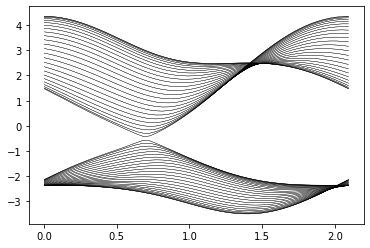

In [489]:
m=1.5
phi=np.pi/3
t1=1
t2=1/3

for ky in np.linspace(0,4*np.pi/(3*np.sqrt(3))):
    En_lower=[]
    En_upper=[]
    kxrange=np.linspace(0,2*np.pi/3)
    for kx in kxrange:
        E_lower,E_upper,states = get_eigen(t1, t2, m, phi, kx, ky)
        En_lower.extend([E_lower])
        En_upper.extend([E_upper])
    plt.plot(kxrange, En_lower, color="k", linewidth=0.3)
    plt.plot(kxrange, En_upper, color="k", linewidth=0.3)

## Plot the dispersion relation

In [2]:
def get_eigen(t1, t2, m, phi, kx, ky):
    hk = haldane_honeycomb(t1, t2, m, phi, kx, ky)
    E,states=np.linalg.eigh(hk)
    return E[0],E[1],states

In [3]:
def band_plot(band_id,m,phi,t2,kxmax,kymax,A):  
    t1=1

    xmom=np.linspace(0,kxmax,100)
    ymom=np.linspace(0,kymax,100)

    En_lower=[]
    En_upper=[]
    for kx in xmom:
        for ky in ymom:
            E_lower,E_upper,states = get_eigen(t1, t2, m, phi, kx, ky)
            En_lower.extend([E_lower])
            En_upper.extend([E_upper])

    Energy_lower=np.transpose(np.reshape(En_lower,(len(xmom),len(ymom))))
    Energy_upper=np.transpose(np.reshape(En_upper,(len(xmom),len(ymom))))
    
    K1 = 2*np.pi/3*np.array([1/3,1./np.sqrt(3)], dtype=float)
    K2 = 8*np.pi/9*np.array([1,0], dtype=float)
    
    if band_id==0:
        plt.plot(K1[0], K1[1], '*k', label=r'$K$')
        plt.plot(K2[0], K2[1], '*k', label=r'$K$')
        plt.contourf(xmom, ymom, Energy_lower, 15, cmap='RdBu')
        plt.xlim(0,A[0])
        plt.ylim(0,A[1])
        plt.colorbar();
        #plt.savefig("Haldane_contour_m="+str(m)+"phi="+str(phi)+"t2="+str(t2)+".pdf")
        plt.savefig("Haldane_contour_lower.pdf")
    elif band_id==1:
        plt.plot(K1[0], K1[1], '*k', label=r'$K$')
        plt.plot(K2[0], K2[1], '*k', label=r'$K$')
        plt.contourf(xmom, ymom, Energy_upper, 15, cmap='RdBu')
        plt.xlim(0,A[0])
        plt.ylim(0,A[1])
        plt.colorbar();
        #plt.savefig("Haldane_contour_m="+str(m)+"phi="+str(phi)+"t2="+str(t2)+".pdf")
        plt.savefig("Haldane_contour_upper.pdf")
    elif band_id==-1:
        plt.plot(K1[0], K1[1], '*k', label=r'$K$')
        plt.plot(K2[0], K2[1], '*k', label=r'$K$')
        plt.contourf(xmom, ymom, Energy_upper-Energy_lower, 15, cmap='RdBu')
        plt.xlim(0,A[0])
        plt.ylim(0,A[1])
        plt.colorbar();
        #plt.savefig("Haldane_contour_m="+str(m)+"phi="+str(phi)+"t2="+str(t2)+".pdf")
        plt.savefig("Haldane_contour_diff.pdf")

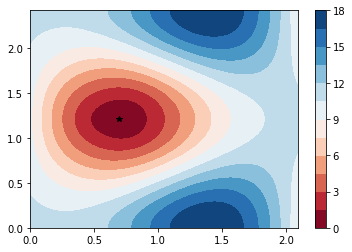

In [461]:
%matplotlib inline
# Contour of dispersion in the (transformed) FBZ
band_plot(-1,4.5,np.pi/3,1,2*np.pi/(3),4*np.pi/(3*np.sqrt(3)),[2*np.pi/(3),4*np.pi/(3*np.sqrt(3))]) 

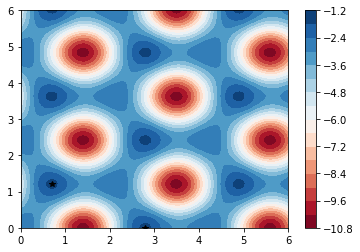

In [462]:
%matplotlib inline
# Contour of dispersion in the (transformed) FBZ
band_plot(0,4.5,np.pi/3,1,6,6,[6,6]) 

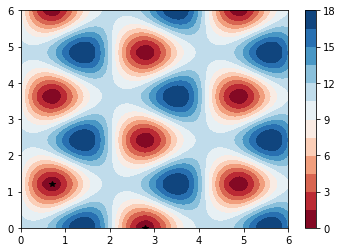

In [463]:
%matplotlib inline
# Contour of dispersion in the (transformed) FBZ
band_plot(-1,4.5,np.pi/3,1,6,6,[6,6]) 

## Calculate the lattice field

In [4]:
def Lat_Field(m,phi,t2,mom,delta_mom):
    t1=1
    
    mom=mom
    momx=np.array([mom[0]+delta_mom[0],mom[1]])
    momy=np.array([mom[0],mom[1]+delta_mom[1]])
    momxy=np.array([mom[0]+delta_mom[0],mom[1]+delta_mom[1]])
    
    El,Eu,psi=get_eigen(t1, t2, m, phi, mom[0], mom[1])
    Elx,Eux,psix=get_eigen(t1, t2, m, phi, momx[0], momx[1])
    Ely,Eux,psiy=get_eigen(t1, t2, m, phi, momy[0], momy[1])
    Elxy,Euxy,psixy=get_eigen(t1, t2, m, phi, momxy[0], momxy[1])
    
    U1x=(np.conj(psi[:,0])@psix[:,0])/(np.absolute(np.conj(psi[:,0])@psix[:,0]))
    U1y=(np.conj(psi[:,0])@psiy[:,0])/(np.absolute(np.conj(psi[:,0])@psiy[:,0]))
    U2x=(np.conj(psix[:,0])@psixy[:,0])/(np.absolute(np.conj(psix[:,0])@psixy[:,0]))
    U2y=(np.conj(psiy[:,0])@psixy[:,0])/(np.absolute(np.conj(psiy[:,0])@psixy[:,0]))

    LField=np.log(U1x*U2x/(U2y*U1y))

    return LField

## Check lattice field

In [5]:
def latF(k_vec, Dk, dim):
    """ Calulating lattice field using the definition:
    F12 = ln[ U1 * U2(k+1) * U1(k_2)^-1 * U2(k)^-1 ]
    so for each k=(kx,ky) point, four U must be calculate.
    The lattice field has the same dimension of number of
    energy bands.
    
    in: k-point k_vec=(kx,ky), Dk=(Dkx,Dky), dim: dim of H(k)
    out: lattice field corresponding to each band as a n 
    dimensional vec
    """

    # Here we calculate the band structure and sort
    # them from low to high eigenenergies

    k = k_vec
    E, aux = lg.eig( haldane_honeycomb(1,1,4.5,np.pi/3,k[0],k[1]) )
    idx = E.real.argsort()
    E_sort = E[idx].real
    psi = aux[:,idx]

    k = np.array([k_vec[0]+Dk[0], k_vec[1]], float)
    E, aux = lg.eig(haldane_honeycomb(1,1,4.5,np.pi/3,k[0],k[1]) )
    idx = E.real.argsort()
    psiDx  = aux[:,idx]

    k = np.array([k_vec[0], k_vec[1]+Dk[1]], float)
    E, aux = lg.eig( haldane_honeycomb(1,1,4.5,np.pi/3,k[0],k[1]) )
    idx = E.real.argsort()
    psiDy = aux[:,idx]

    k = np.array([k_vec[0]+Dk[0], k_vec[1]+Dk[1]], float)
    E, aux = lg.eig( haldane_honeycomb(1,1,4.5,np.pi/3,k[0],k[1]) )
    idx = E.real.argsort()
    psiDxDy = aux[:,idx]

    U1x = np.zeros((dim), dtype=complex)
    U2y = np.zeros((dim), dtype=complex)
    U1y = np.zeros((dim), dtype=complex)
    U2x = np.zeros((dim), dtype=complex)

    for i in range(dim):
        U1x[i] = build_U(psi[:,i], psiDx[:,i] )
        U2y[i] = build_U(psi[:,i], psiDy[:,i] )
        U1y[i] = build_U(psiDy[:,i], psiDxDy[:,i] )
        U2x[i] = build_U(psiDx[:,i], psiDxDy[:,i] )

    F12 = np.zeros((dim), dtype=complex)

    F12 = np.log( U1x * U2x * 1./U1y * 1./U2y)
    
    return F12

In [404]:
E, aux = lg.eig( haldane_honeycomb(1,1,4.5,np.pi/3,1,1) )

In [405]:
aux

array([[ 0.95581078+0.j        ,  0.02296688+0.29308407j],
       [-0.02296688+0.29308407j,  0.95581078+0.j        ]])

In [406]:
E

array([ 0.45827721-1.82154093e-17j, -2.6804368 +1.82154093e-17j])

In [407]:
El,Eu,states=get_eigen(1,1,4.5,np.pi/3,1,1)

In [408]:
states

array([[-0.29398257+0.j        , -0.95581078-0.j        ],
       [-0.07467107+0.95288954j,  0.02296688-0.29308407j]])

In [409]:
El

-2.6804368014819673

In [410]:
Eu

0.45827721132217514

In [411]:
latF(np.array([2.4,2.4]),np.array([0.01,0.01]),2)

array([3.68026801e-16-0.00012373j, 1.45982570e-16+0.00012373j])

In [412]:
Lat_Field(4.5,np.pi/3,1,np.array([2.4,2.4]),np.array([0.01,0.01]))

(3.495656500534602e-17+0.00012372752007716419j)

## Calculating the Berry curvature and Chern number

In [6]:
def berry_curv_plot(m,phi,t2,kxmax,kymax,A):  
    t1=1

    xmom=np.linspace(0,kxmax,200)
    ymom=np.linspace(0,kymax,200)
    
    delta_mom=np.array([kxmax/200,kymax/200])
    Berry_curv=[]
    chern=0
    for kx in xmom:
        for ky in ymom:
            mom=np.array([kx,ky])
            LField = Lat_Field(m,phi,t2,mom,delta_mom)
            Berry_curv.extend([LField])
            chern+=LField/(2j*np.pi)
      
    K1 = 2*np.pi/3*np.array([1/3,1./np.sqrt(3)], dtype=float)
    K2 = 8*np.pi/9*np.array([1,0], dtype=float)
    plt.plot(K1[0], K1[1], '*k', label=r'$K$')
    plt.plot(K2[0], K2[1], '*k', label=r'$K$')
    Berry_curvature=np.transpose(np.reshape(Berry_curv,(len(xmom),len(ymom))))
    plt.contourf(xmom, ymom, np.imag(Berry_curvature), 15, cmap='RdBu')
    plt.xlim(0,A[0])
    plt.ylim(0,A[1])
    plt.colorbar();
    plt.savefig("Berry_curvature.pdf")
    
    print("The chern number is: "+str(np.real(chern)))

<IPython.core.display.Javascript object>


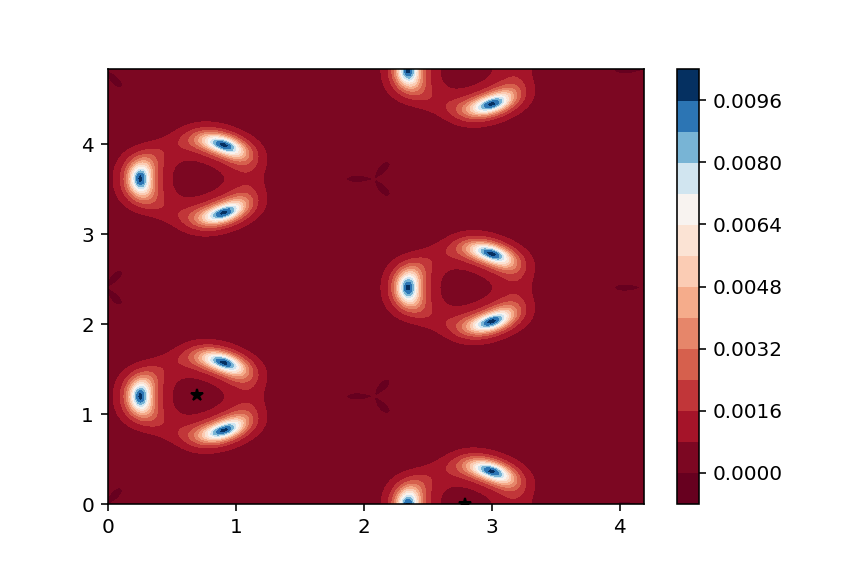

The chern number is: 3.985375133286634


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [510]:
%matplotlib notebook

berry_curv_plot(2.5,np.pi/3,1,2*2*np.pi/(3),2*4*np.pi/(3*np.sqrt(3)),[2*2*np.pi/(3),2*4*np.pi/(3*np.sqrt(3))])

In [518]:
Lat_Field(2.5,np.pi/3,1,np.array([3,0.33]),np.array([0.022,0.022]))

(-4.384920161346062e-17+0.008324474785433824j)

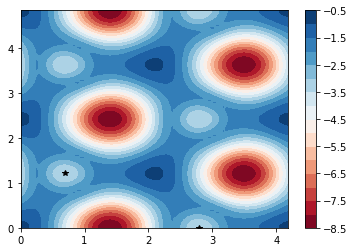

In [503]:
%matplotlib inline
# Contour of dispersion in the (transformed) FBZ
band_plot(0,2.5,np.pi/3,1,2*2*np.pi/(3),2*4*np.pi/(3*np.sqrt(3)),[2*2*np.pi/(3),2*4*np.pi/(3*np.sqrt(3))]) 

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def threedberry_curv_plot(m,phi,t2,kxmax,kymax,A):  
    t1=1

    xmom=np.linspace(0,kxmax,200)
    ymom=np.linspace(0,kymax,200)
    
    delta_mom=np.array([kxmax/200,kymax/200])
    Berry_curv=[]
    chern=0
    for kx in xmom:
        for ky in ymom:
            mom=np.array([kx,ky])
            LField = Lat_Field(m,phi,t2,mom,delta_mom)
            Berry_curv.extend([LField])
            chern+=LField/(2j*np.pi)
      
    K1 = 2*np.pi/3*np.array([1/3,1./np.sqrt(3)], dtype=float)
    K2 = 8*np.pi/9*np.array([1,0], dtype=float)
    
    Berry_curvature=np.transpose(np.reshape(Berry_curv,(len(xmom),len(ymom))))
    
    fig = plt.figure()
    
    ax = fig.gca(projection='3d')

    kx, ky = np.meshgrid(xmom,ymom)

    surf = ax.plot_surface(kx, ky, np.imag(Berry_curvature),linewidth=0, cmap="coolwarm")
    # ax.set_xlim(0,2.*np.pi/3.)
    
    plt.show()

    plt.savefig("3DBerry_curvature.pdf")
    
    print("The chern number is: "+str(np.real(chern)))

<IPython.core.display.Javascript object>


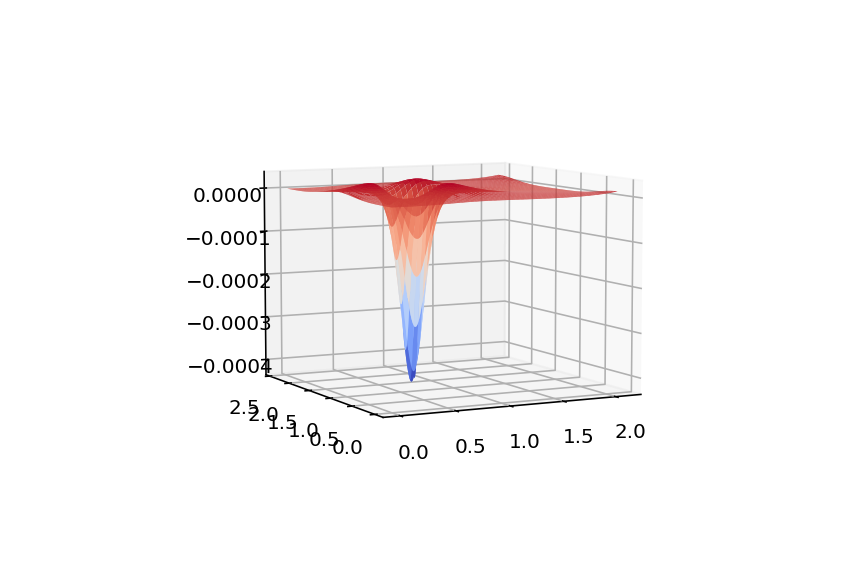

The chern number is: 0.0002804900426178404


In [19]:
%matplotlib notebook

threedberry_curv_plot(5.5,np.pi/3,1,2*np.pi/(3),4*np.pi/(3*np.sqrt(3)),[2*np.pi/(3),4*np.pi/(3*np.sqrt(3))])

In [367]:
def chern(m,phi,t2,kxmax,kymax):  
    t1=1

    xmom=np.linspace(0,kxmax,20)
    ymom=np.linspace(0,kymax,20)
    
    delta_mom=np.array([kxmax/20,kymax/20])
    Berry_curv=[]
    chern=0
    for kx in xmom:
        for ky in ymom:
            mom=np.array([kx,ky])
            LField = Lat_Field(m,phi,t2,mom,delta_mom)
            Berry_curv.extend([LField])
            chern+=LField/(2j*np.pi)
    return np.real(chern)

In [375]:
Chern=[]

mrange=np.linspace(-6,6,100)
phirange=np.linspace(-np.pi,np.pi,100)

n=0

for phi in phirange:
    for m in mrange:
        n+=1
        c=chern(m,phi,1,2*np.pi/(3),4*np.pi/(3*np.sqrt(3)))
        Chern.extend([round(c)])
        print(m,phi,round(c),n/100)
        
Chern=np.transpose(np.reshape(Chern,(len(phirange),len(mrange))))

-6.0 -3.141592653589793 0 0.01
-5.878787878787879 -3.141592653589793 0 0.02
-5.757575757575758 -3.141592653589793 0 0.03
-5.636363636363637 -3.141592653589793 0 0.04
-5.515151515151516 -3.141592653589793 0 0.05
-5.393939393939394 -3.141592653589793 0 0.06
-5.2727272727272725 -3.141592653589793 0 0.07
-5.151515151515151 -3.141592653589793 0 0.08
-5.03030303030303 -3.141592653589793 0 0.09
-4.909090909090909 -3.141592653589793 0 0.1
-4.787878787878788 -3.141592653589793 0 0.11
-4.666666666666666 -3.141592653589793 0 0.12
-4.545454545454545 -3.141592653589793 0 0.13
-4.424242424242424 -3.141592653589793 0 0.14
-4.303030303030303 -3.141592653589793 0 0.15
-4.181818181818182 -3.141592653589793 0 0.16
-4.0606060606060606 -3.141592653589793 0 0.17
-3.9393939393939394 -3.141592653589793 0 0.18
-3.8181818181818183 -3.141592653589793 0 0.19
-3.696969696969697 -3.141592653589793 0 0.2
-3.5757575757575757 -3.141592653589793 0 0.21
-3.4545454545454546 -3.141592653589793 0 0.22
-3.333333333333333 -3

4.666666666666668 -3.0781261353354537 0 1.89
4.787878787878789 -3.0781261353354537 0 1.9
4.90909090909091 -3.0781261353354537 0 1.91
5.030303030303031 -3.0781261353354537 0 1.92
5.151515151515152 -3.0781261353354537 0 1.93
5.272727272727273 -3.0781261353354537 0 1.94
5.3939393939393945 -3.0781261353354537 0 1.95
5.515151515151516 -3.0781261353354537 0 1.96
5.636363636363637 -3.0781261353354537 0 1.97
5.757575757575758 -3.0781261353354537 0 1.98
5.878787878787879 -3.0781261353354537 0 1.99
6.0 -3.0781261353354537 0 2.0
-6.0 -3.0146596170811146 0 2.01
-5.878787878787879 -3.0146596170811146 0 2.02
-5.757575757575758 -3.0146596170811146 0 2.03
-5.636363636363637 -3.0146596170811146 0 2.04
-5.515151515151516 -3.0146596170811146 0 2.05
-5.393939393939394 -3.0146596170811146 0 2.06
-5.2727272727272725 -3.0146596170811146 0 2.07
-5.151515151515151 -3.0146596170811146 0 2.08
-5.03030303030303 -3.0146596170811146 0 2.09
-4.909090909090909 -3.0146596170811146 0 2.1
-4.787878787878788 -3.014659617

2.7272727272727266 -2.951193098826775 0 3.73
2.8484848484848495 -2.951193098826775 0 3.74
2.9696969696969706 -2.951193098826775 0 3.75
3.0909090909090917 -2.951193098826775 0 3.76
3.212121212121213 -2.951193098826775 0 3.77
3.333333333333334 -2.951193098826775 0 3.78
3.454545454545455 -2.951193098826775 0 3.79
3.575757575757576 -2.951193098826775 0 3.8
3.6969696969696972 -2.951193098826775 0 3.81
3.8181818181818183 -2.951193098826775 0 3.82
3.9393939393939394 -2.951193098826775 0 3.83
4.0606060606060606 -2.951193098826775 0 3.84
4.181818181818182 -2.951193098826775 0 3.85
4.303030303030303 -2.951193098826775 0 3.86
4.424242424242424 -2.951193098826775 0 3.87
4.545454545454545 -2.951193098826775 0 3.88
4.666666666666668 -2.951193098826775 0 3.89
4.787878787878789 -2.951193098826775 0 3.9
4.90909090909091 -2.951193098826775 0 3.91
5.030303030303031 -2.951193098826775 0 3.92
5.151515151515152 -2.951193098826775 0 3.93
5.272727272727273 -2.951193098826775 0 3.94
5.3939393939393945 -2.95119

-1.1515151515151514 -2.697327025809418 -1 7.41
-1.0303030303030303 -2.697327025809418 -1 7.42
-0.9090909090909092 -2.697327025809418 -1 7.43
-0.7878787878787881 -2.697327025809418 -1 7.44
-0.6666666666666661 -2.697327025809418 -1 7.45
-0.545454545454545 -2.697327025809418 -1 7.46
-0.42424242424242387 -2.697327025809418 -1 7.47
-0.30303030303030276 -2.697327025809418 -1 7.48
-0.18181818181818166 -2.697327025809418 -1 7.49
-0.06060606060606055 -2.697327025809418 -1 7.5
0.06060606060606055 -2.697327025809418 -1 7.51
0.18181818181818166 -2.697327025809418 -1 7.52
0.30303030303030276 -2.697327025809418 -1 7.53
0.42424242424242475 -2.697327025809418 -1 7.54
0.5454545454545459 -2.697327025809418 -1 7.55
0.666666666666667 -2.697327025809418 -1 7.56
0.7878787878787881 -2.697327025809418 -1 7.57
0.9090909090909092 -2.697327025809418 -1 7.58
1.0303030303030303 -2.697327025809418 -1 7.59
1.1515151515151514 -2.697327025809418 -1 7.6
1.2727272727272734 -2.697327025809418 -1 7.61
1.3939393939393945 -

-2.9696969696969697 -2.5703939893007397 0 9.26
-2.8484848484848486 -2.5703939893007397 0 9.27
-2.727272727272727 -2.5703939893007397 -1 9.28
-2.606060606060606 -2.5703939893007397 -1 9.29
-2.484848484848485 -2.5703939893007397 -1 9.3
-2.3636363636363633 -2.5703939893007397 -1 9.31
-2.242424242424242 -2.5703939893007397 -1 9.32
-2.121212121212121 -2.5703939893007397 -1 9.33
-2.0 -2.5703939893007397 -1 9.34
-1.878787878787879 -2.5703939893007397 -1 9.35
-1.7575757575757578 -2.5703939893007397 -1 9.36
-1.6363636363636367 -2.5703939893007397 -1 9.37
-1.5151515151515147 -2.5703939893007397 -1 9.38
-1.3939393939393936 -2.5703939893007397 -1 9.39
-1.2727272727272725 -2.5703939893007397 -1 9.4
-1.1515151515151514 -2.5703939893007397 -1 9.41
-1.0303030303030303 -2.5703939893007397 -1 9.42
-0.9090909090909092 -2.5703939893007397 -1 9.43
-0.7878787878787881 -2.5703939893007397 -1 9.44
-0.6666666666666661 -2.5703939893007397 -1 9.45
-0.545454545454545 -2.5703939893007397 -1 9.46
-0.424242424242423

-5.393939393939394 -2.443460952792061 0 11.06
-5.2727272727272725 -2.443460952792061 0 11.07
-5.151515151515151 -2.443460952792061 0 11.08
-5.03030303030303 -2.443460952792061 0 11.09
-4.909090909090909 -2.443460952792061 0 11.1
-4.787878787878788 -2.443460952792061 0 11.11
-4.666666666666666 -2.443460952792061 0 11.12
-4.545454545454545 -2.443460952792061 0 11.13
-4.424242424242424 -2.443460952792061 0 11.14
-4.303030303030303 -2.443460952792061 0 11.15
-4.181818181818182 -2.443460952792061 0 11.16
-4.0606060606060606 -2.443460952792061 0 11.17
-3.9393939393939394 -2.443460952792061 0 11.18
-3.8181818181818183 -2.443460952792061 0 11.19
-3.696969696969697 -2.443460952792061 0 11.2
-3.5757575757575757 -2.443460952792061 0 11.21
-3.4545454545454546 -2.443460952792061 0 11.22
-3.333333333333333 -2.443460952792061 0 11.23
-3.212121212121212 -2.443460952792061 -1 11.24
-3.090909090909091 -2.443460952792061 -1 11.25
-2.9696969696969697 -2.443460952792061 -1 11.26
-2.8484848484848486 -2.4434

4.181818181818182 -2.379994434537722 0 12.85
4.303030303030303 -2.379994434537722 0 12.86
4.424242424242424 -2.379994434537722 0 12.87
4.545454545454545 -2.379994434537722 0 12.88
4.666666666666668 -2.379994434537722 0 12.89
4.787878787878789 -2.379994434537722 0 12.9
4.90909090909091 -2.379994434537722 0 12.91
5.030303030303031 -2.379994434537722 0 12.92
5.151515151515152 -2.379994434537722 0 12.93
5.272727272727273 -2.379994434537722 0 12.94
5.3939393939393945 -2.379994434537722 0 12.95
5.515151515151516 -2.379994434537722 0 12.96
5.636363636363637 -2.379994434537722 0 12.97
5.757575757575758 -2.379994434537722 0 12.98
5.878787878787879 -2.379994434537722 0 12.99
6.0 -2.379994434537722 0 13.0
-6.0 -2.3165279162833827 0 13.01
-5.878787878787879 -2.3165279162833827 0 13.02
-5.757575757575758 -2.3165279162833827 0 13.03
-5.636363636363637 -2.3165279162833827 0 13.04
-5.515151515151516 -2.3165279162833827 0 13.05
-5.393939393939394 -2.3165279162833827 0 13.06
-5.2727272727272725 -2.31652

1.5151515151515156 -2.2530613980290433 -1 14.63
1.6363636363636367 -2.2530613980290433 -1 14.64
1.7575757575757578 -2.2530613980290433 -1 14.65
1.878787878787879 -2.2530613980290433 -1 14.66
2.0 -2.2530613980290433 -1 14.67
2.121212121212121 -2.2530613980290433 -1 14.68
2.242424242424242 -2.2530613980290433 -1 14.69
2.3636363636363633 -2.2530613980290433 -1 14.7
2.4848484848484844 -2.2530613980290433 -1 14.71
2.6060606060606055 -2.2530613980290433 -1 14.72
2.7272727272727266 -2.2530613980290433 -1 14.73
2.8484848484848495 -2.2530613980290433 -1 14.74
2.9696969696969706 -2.2530613980290433 -1 14.75
3.0909090909090917 -2.2530613980290433 -1 14.76
3.212121212121213 -2.2530613980290433 -1 14.77
3.333333333333334 -2.2530613980290433 -1 14.78
3.454545454545455 -2.2530613980290433 -1 14.79
3.575757575757576 -2.2530613980290433 -1 14.8
3.6969696969696972 -2.2530613980290433 -1 14.81
3.8181818181818183 -2.2530613980290433 -1 14.82
3.9393939393939394 -2.2530613980290433 -1 14.83
4.06060606060606

-1.2727272727272725 -2.126128361520365 -1 16.4
-1.1515151515151514 -2.126128361520365 -1 16.41
-1.0303030303030303 -2.126128361520365 -1 16.42
-0.9090909090909092 -2.126128361520365 -1 16.43
-0.7878787878787881 -2.126128361520365 -1 16.44
-0.6666666666666661 -2.126128361520365 -1 16.45
-0.545454545454545 -2.126128361520365 -1 16.46
-0.42424242424242387 -2.126128361520365 -1 16.47
-0.30303030303030276 -2.126128361520365 -1 16.48
-0.18181818181818166 -2.126128361520365 -1 16.49
-0.06060606060606055 -2.126128361520365 -1 16.5
0.06060606060606055 -2.126128361520365 -1 16.51
0.18181818181818166 -2.126128361520365 -1 16.52
0.30303030303030276 -2.126128361520365 -1 16.53
0.42424242424242475 -2.126128361520365 -1 16.54
0.5454545454545459 -2.126128361520365 -1 16.55
0.666666666666667 -2.126128361520365 -1 16.56
0.7878787878787881 -2.126128361520365 -1 16.57
0.9090909090909092 -2.126128361520365 -1 16.58
1.0303030303030303 -2.126128361520365 -1 16.59
1.1515151515151514 -2.126128361520365 -1 16.6

-3.9393939393939394 -1.9991953250116865 -1 18.18
-3.8181818181818183 -1.9991953250116865 -1 18.19
-3.696969696969697 -1.9991953250116865 -1 18.2
-3.5757575757575757 -1.9991953250116865 -1 18.21
-3.4545454545454546 -1.9991953250116865 -1 18.22
-3.333333333333333 -1.9991953250116865 -1 18.23
-3.212121212121212 -1.9991953250116865 -1 18.24
-3.090909090909091 -1.9991953250116865 -1 18.25
-2.9696969696969697 -1.9991953250116865 -1 18.26
-2.8484848484848486 -1.9991953250116865 -1 18.27
-2.727272727272727 -1.9991953250116865 -1 18.28
-2.606060606060606 -1.9991953250116865 -1 18.29
-2.484848484848485 -1.9991953250116865 -1 18.3
-2.3636363636363633 -1.9991953250116865 -1 18.31
-2.242424242424242 -1.9991953250116865 -1 18.32
-2.121212121212121 -1.9991953250116865 -1 18.33
-2.0 -1.9991953250116865 -1 18.34
-1.878787878787879 -1.9991953250116865 -1 18.35
-1.7575757575757578 -1.9991953250116865 -1 18.36
-1.6363636363636367 -1.9991953250116865 -1 18.37
-1.5151515151515147 -1.9991953250116865 -1 18.3

4.90909090909091 -1.9357288067573473 0 19.91
5.030303030303031 -1.9357288067573473 0 19.92
5.151515151515152 -1.9357288067573473 0 19.93
5.272727272727273 -1.9357288067573473 0 19.94
5.3939393939393945 -1.9357288067573473 0 19.95
5.515151515151516 -1.9357288067573473 0 19.96
5.636363636363637 -1.9357288067573473 0 19.97
5.757575757575758 -1.9357288067573473 0 19.98
5.878787878787879 -1.9357288067573473 0 19.99
6.0 -1.9357288067573473 0 20.0
-6.0 -1.872262288503008 0 20.01
-5.878787878787879 -1.872262288503008 0 20.02
-5.757575757575758 -1.872262288503008 0 20.03
-5.636363636363637 -1.872262288503008 0 20.04
-5.515151515151516 -1.872262288503008 0 20.05
-5.393939393939394 -1.872262288503008 0 20.06
-5.2727272727272725 -1.872262288503008 0 20.07
-5.151515151515151 -1.872262288503008 0 20.08
-5.03030303030303 -1.872262288503008 0 20.09
-4.909090909090909 -1.872262288503008 0 20.1
-4.787878787878788 -1.872262288503008 -1 20.11
-4.666666666666666 -1.872262288503008 -1 20.12
-4.5454545454545

2.121212121212121 -1.8087957702486688 -1 21.68
2.242424242424242 -1.8087957702486688 -1 21.69
2.3636363636363633 -1.8087957702486688 -1 21.7
2.4848484848484844 -1.8087957702486688 -1 21.71
2.6060606060606055 -1.8087957702486688 -1 21.72
2.7272727272727266 -1.8087957702486688 -1 21.73
2.8484848484848495 -1.8087957702486688 -1 21.74
2.9696969696969706 -1.8087957702486688 -1 21.75
3.0909090909090917 -1.8087957702486688 -1 21.76
3.212121212121213 -1.8087957702486688 -1 21.77
3.333333333333334 -1.8087957702486688 -1 21.78
3.454545454545455 -1.8087957702486688 -1 21.79
3.575757575757576 -1.8087957702486688 -1 21.8
3.6969696969696972 -1.8087957702486688 -1 21.81
3.8181818181818183 -1.8087957702486688 -1 21.82
3.9393939393939394 -1.8087957702486688 -1 21.83
4.0606060606060606 -1.8087957702486688 -1 21.84
4.181818181818182 -1.8087957702486688 -1 21.85
4.303030303030303 -1.8087957702486688 -1 21.86
4.424242424242424 -1.8087957702486688 -1 21.87
4.545454545454545 -1.8087957702486688 -1 21.88
4.66

-1.0303030303030303 -1.6818627337399903 -1 23.42
-0.9090909090909092 -1.6818627337399903 -1 23.43
-0.7878787878787881 -1.6818627337399903 -1 23.44
-0.6666666666666661 -1.6818627337399903 -1 23.45
-0.545454545454545 -1.6818627337399903 -1 23.46
-0.42424242424242387 -1.6818627337399903 -1 23.47
-0.30303030303030276 -1.6818627337399903 -1 23.48
-0.18181818181818166 -1.6818627337399903 -1 23.49
-0.06060606060606055 -1.6818627337399903 -1 23.5
0.06060606060606055 -1.6818627337399903 -1 23.51
0.18181818181818166 -1.6818627337399903 -1 23.52
0.30303030303030276 -1.6818627337399903 -1 23.53
0.42424242424242475 -1.6818627337399903 -1 23.54
0.5454545454545459 -1.6818627337399903 -1 23.55
0.666666666666667 -1.6818627337399903 -1 23.56
0.7878787878787881 -1.6818627337399903 -1 23.57
0.9090909090909092 -1.6818627337399903 -1 23.58
1.0303030303030303 -1.6818627337399903 -1 23.59
1.1515151515151514 -1.6818627337399903 -1 23.6
1.2727272727272734 -1.6818627337399903 -1 23.61
1.3939393939393945 -1.68186

-4.0606060606060606 -1.5549296972313116 -1 25.17
-3.9393939393939394 -1.5549296972313116 -1 25.18
-3.8181818181818183 -1.5549296972313116 -1 25.19
-3.696969696969697 -1.5549296972313116 -1 25.2
-3.5757575757575757 -1.5549296972313116 -1 25.21
-3.4545454545454546 -1.5549296972313116 -1 25.22
-3.333333333333333 -1.5549296972313116 -1 25.23
-3.212121212121212 -1.5549296972313116 -1 25.24
-3.090909090909091 -1.5549296972313116 -1 25.25
-2.9696969696969697 -1.5549296972313116 -1 25.26
-2.8484848484848486 -1.5549296972313116 -1 25.27
-2.727272727272727 -1.5549296972313116 -1 25.28
-2.606060606060606 -1.5549296972313116 -1 25.29
-2.484848484848485 -1.5549296972313116 -1 25.3
-2.3636363636363633 -1.5549296972313116 -1 25.31
-2.242424242424242 -1.5549296972313116 -1 25.32
-2.121212121212121 -1.5549296972313116 -1 25.33
-2.0 -1.5549296972313116 -1 25.34
-1.878787878787879 -1.5549296972313116 -1 25.35
-1.7575757575757578 -1.5549296972313116 -1 25.36
-1.6363636363636367 -1.5549296972313116 -1 25.3

4.90909090909091 -1.4914631789769723 -1 26.91
5.030303030303031 -1.4914631789769723 -1 26.92
5.151515151515152 -1.4914631789769723 -1 26.93
5.272727272727273 -1.4914631789769723 0 26.94
5.3939393939393945 -1.4914631789769723 0 26.95
5.515151515151516 -1.4914631789769723 0 26.96
5.636363636363637 -1.4914631789769723 0 26.97
5.757575757575758 -1.4914631789769723 0 26.98
5.878787878787879 -1.4914631789769723 0 26.99
6.0 -1.4914631789769723 0 27.0
-6.0 -1.427996660722633 0 27.01
-5.878787878787879 -1.427996660722633 0 27.02
-5.757575757575758 -1.427996660722633 0 27.03
-5.636363636363637 -1.427996660722633 0 27.04
-5.515151515151516 -1.427996660722633 0 27.05
-5.393939393939394 -1.427996660722633 0 27.06
-5.2727272727272725 -1.427996660722633 0 27.07
-5.151515151515151 -1.427996660722633 0 27.08
-5.03030303030303 -1.427996660722633 -1 27.09
-4.909090909090909 -1.427996660722633 -1 27.1
-4.787878787878788 -1.427996660722633 -1 27.11
-4.666666666666666 -1.427996660722633 -1 27.12
-4.54545454

2.0 -1.3645301424682938 -1 28.67
2.121212121212121 -1.3645301424682938 -1 28.68
2.242424242424242 -1.3645301424682938 -1 28.69
2.3636363636363633 -1.3645301424682938 -1 28.7
2.4848484848484844 -1.3645301424682938 -1 28.71
2.6060606060606055 -1.3645301424682938 -1 28.72
2.7272727272727266 -1.3645301424682938 -1 28.73
2.8484848484848495 -1.3645301424682938 -1 28.74
2.9696969696969706 -1.3645301424682938 -1 28.75
3.0909090909090917 -1.3645301424682938 -1 28.76
3.212121212121213 -1.3645301424682938 -1 28.77
3.333333333333334 -1.3645301424682938 -1 28.78
3.454545454545455 -1.3645301424682938 -1 28.79
3.575757575757576 -1.3645301424682938 -1 28.8
3.6969696969696972 -1.3645301424682938 -1 28.81
3.8181818181818183 -1.3645301424682938 -1 28.82
3.9393939393939394 -1.3645301424682938 -1 28.83
4.0606060606060606 -1.3645301424682938 -1 28.84
4.181818181818182 -1.3645301424682938 -1 28.85
4.303030303030303 -1.3645301424682938 -1 28.86
4.424242424242424 -1.3645301424682938 -1 28.87
4.545454545454545 

-0.42424242424242387 -1.2375971059596154 -1 30.47
-0.30303030303030276 -1.2375971059596154 -1 30.48
-0.18181818181818166 -1.2375971059596154 -1 30.49
-0.06060606060606055 -1.2375971059596154 -1 30.5
0.06060606060606055 -1.2375971059596154 -1 30.51
0.18181818181818166 -1.2375971059596154 -1 30.52
0.30303030303030276 -1.2375971059596154 -1 30.53
0.42424242424242475 -1.2375971059596154 -1 30.54
0.5454545454545459 -1.2375971059596154 -1 30.55
0.666666666666667 -1.2375971059596154 -1 30.56
0.7878787878787881 -1.2375971059596154 -1 30.57
0.9090909090909092 -1.2375971059596154 -1 30.58
1.0303030303030303 -1.2375971059596154 -1 30.59
1.1515151515151514 -1.2375971059596154 -1 30.6
1.2727272727272734 -1.2375971059596154 -1 30.61
1.3939393939393945 -1.2375971059596154 -1 30.62
1.5151515151515156 -1.2375971059596154 -1 30.63
1.6363636363636367 -1.2375971059596154 -1 30.64
1.7575757575757578 -1.2375971059596154 -1 30.65
1.878787878787879 -1.2375971059596154 -1 30.66
2.0 -1.2375971059596154 -1 30.67

-2.9696969696969697 -1.1106640694509369 -1 32.26
-2.8484848484848486 -1.1106640694509369 -1 32.27
-2.727272727272727 -1.1106640694509369 -1 32.28
-2.606060606060606 -1.1106640694509369 -1 32.29
-2.484848484848485 -1.1106640694509369 -1 32.3
-2.3636363636363633 -1.1106640694509369 -1 32.31
-2.242424242424242 -1.1106640694509369 -1 32.32
-2.121212121212121 -1.1106640694509369 -1 32.33
-2.0 -1.1106640694509369 -1 32.34
-1.878787878787879 -1.1106640694509369 -1 32.35
-1.7575757575757578 -1.1106640694509369 -1 32.36
-1.6363636363636367 -1.1106640694509369 -1 32.37
-1.5151515151515147 -1.1106640694509369 -1 32.38
-1.3939393939393936 -1.1106640694509369 -1 32.39
-1.2727272727272725 -1.1106640694509369 -1 32.4
-1.1515151515151514 -1.1106640694509369 -1 32.41
-1.0303030303030303 -1.1106640694509369 -1 32.42
-0.9090909090909092 -1.1106640694509369 -1 32.43
-0.7878787878787881 -1.1106640694509369 -1 32.44
-0.6666666666666661 -1.1106640694509369 -1 32.45
-0.545454545454545 -1.1106640694509369 -1 3

-5.515151515151516 -0.9837310329422584 0 34.05
-5.393939393939394 -0.9837310329422584 0 34.06
-5.2727272727272725 -0.9837310329422584 0 34.07
-5.151515151515151 -0.9837310329422584 0 34.08
-5.03030303030303 -0.9837310329422584 0 34.09
-4.909090909090909 -0.9837310329422584 0 34.1
-4.787878787878788 -0.9837310329422584 0 34.11
-4.666666666666666 -0.9837310329422584 0 34.12
-4.545454545454545 -0.9837310329422584 0 34.13
-4.424242424242424 -0.9837310329422584 0 34.14
-4.303030303030303 -0.9837310329422584 0 34.15
-4.181818181818182 -0.9837310329422584 -1 34.16
-4.0606060606060606 -0.9837310329422584 -1 34.17
-3.9393939393939394 -0.9837310329422584 -1 34.18
-3.8181818181818183 -0.9837310329422584 -1 34.19
-3.696969696969697 -0.9837310329422584 -1 34.2
-3.5757575757575757 -0.9837310329422584 -1 34.21
-3.4545454545454546 -0.9837310329422584 -1 34.22
-3.333333333333333 -0.9837310329422584 -1 34.23
-3.212121212121212 -0.9837310329422584 -1 34.24
-3.090909090909091 -0.9837310329422584 -1 34.25


3.8181818181818183 -0.9202645146879189 -1 35.82
3.9393939393939394 -0.9202645146879189 -1 35.83
4.0606060606060606 -0.9202645146879189 -1 35.84
4.181818181818182 -0.9202645146879189 0 35.85
4.303030303030303 -0.9202645146879189 0 35.86
4.424242424242424 -0.9202645146879189 0 35.87
4.545454545454545 -0.9202645146879189 0 35.88
4.666666666666668 -0.9202645146879189 0 35.89
4.787878787878789 -0.9202645146879189 0 35.9
4.90909090909091 -0.9202645146879189 0 35.91
5.030303030303031 -0.9202645146879189 0 35.92
5.151515151515152 -0.9202645146879189 0 35.93
5.272727272727273 -0.9202645146879189 0 35.94
5.3939393939393945 -0.9202645146879189 0 35.95
5.515151515151516 -0.9202645146879189 0 35.96
5.636363636363637 -0.9202645146879189 0 35.97
5.757575757575758 -0.9202645146879189 0 35.98
5.878787878787879 -0.9202645146879189 0 35.99
6.0 -0.9202645146879189 0 36.0
-6.0 -0.8567979964335799 0 36.01
-5.878787878787879 -0.8567979964335799 0 36.02
-5.757575757575758 -0.8567979964335799 0 36.03
-5.636363

1.0303030303030303 -0.7933314781792404 -1 37.59
1.1515151515151514 -0.7933314781792404 -1 37.6
1.2727272727272734 -0.7933314781792404 -1 37.61
1.3939393939393945 -0.7933314781792404 -1 37.62
1.5151515151515156 -0.7933314781792404 -1 37.63
1.6363636363636367 -0.7933314781792404 -1 37.64
1.7575757575757578 -0.7933314781792404 -1 37.65
1.878787878787879 -0.7933314781792404 -1 37.66
2.0 -0.7933314781792404 -1 37.67
2.121212121212121 -0.7933314781792404 -1 37.68
2.242424242424242 -0.7933314781792404 -1 37.69
2.3636363636363633 -0.7933314781792404 -1 37.7
2.4848484848484844 -0.7933314781792404 -1 37.71
2.6060606060606055 -0.7933314781792404 -1 37.72
2.7272727272727266 -0.7933314781792404 -1 37.73
2.8484848484848495 -0.7933314781792404 -1 37.74
2.9696969696969706 -0.7933314781792404 -1 37.75
3.0909090909090917 -0.7933314781792404 -1 37.76
3.212121212121213 -0.7933314781792404 -1 37.77
3.333333333333334 -0.7933314781792404 -1 37.78
3.454545454545455 -0.7933314781792404 -1 37.79
3.5757575757575

-1.3939393939393936 -0.666398441670562 -1 39.39
-1.2727272727272725 -0.666398441670562 -1 39.4
-1.1515151515151514 -0.666398441670562 -1 39.41
-1.0303030303030303 -0.666398441670562 -1 39.42
-0.9090909090909092 -0.666398441670562 -1 39.43
-0.7878787878787881 -0.666398441670562 -1 39.44
-0.6666666666666661 -0.666398441670562 -1 39.45
-0.545454545454545 -0.666398441670562 -1 39.46
-0.42424242424242387 -0.666398441670562 -1 39.47
-0.30303030303030276 -0.666398441670562 -1 39.48
-0.18181818181818166 -0.666398441670562 -1 39.49
-0.06060606060606055 -0.666398441670562 -1 39.5
0.06060606060606055 -0.666398441670562 -1 39.51
0.18181818181818166 -0.666398441670562 -1 39.52
0.30303030303030276 -0.666398441670562 -1 39.53
0.42424242424242475 -0.666398441670562 -1 39.54
0.5454545454545459 -0.666398441670562 -1 39.55
0.666666666666667 -0.666398441670562 -1 39.56
0.7878787878787881 -0.666398441670562 -1 39.57
0.9090909090909092 -0.666398441670562 -1 39.58
1.0303030303030303 -0.666398441670562 -1 39.

5.030303030303031 -0.47599888690754444 0 42.92
5.151515151515152 -0.47599888690754444 0 42.93
5.272727272727273 -0.47599888690754444 0 42.94
5.3939393939393945 -0.47599888690754444 0 42.95
5.515151515151516 -0.47599888690754444 0 42.96
5.636363636363637 -0.47599888690754444 0 42.97
5.757575757575758 -0.47599888690754444 0 42.98
5.878787878787879 -0.47599888690754444 0 42.99
6.0 -0.47599888690754444 0 43.0
-6.0 -0.412532368653205 0 43.01
-5.878787878787879 -0.412532368653205 0 43.02
-5.757575757575758 -0.412532368653205 0 43.03
-5.636363636363637 -0.412532368653205 0 43.04
-5.515151515151516 -0.412532368653205 0 43.05
-5.393939393939394 -0.412532368653205 0 43.06
-5.2727272727272725 -0.412532368653205 0 43.07
-5.151515151515151 -0.412532368653205 0 43.08
-5.03030303030303 -0.412532368653205 0 43.09
-4.909090909090909 -0.412532368653205 0 43.1
-4.787878787878788 -0.412532368653205 0 43.11
-4.666666666666666 -0.412532368653205 0 43.12
-4.545454545454545 -0.412532368653205 0 43.13
-4.42424

2.4848484848484844 -0.34906585039886595 0 44.71
2.6060606060606055 -0.34906585039886595 0 44.72
2.7272727272727266 -0.34906585039886595 0 44.73
2.8484848484848495 -0.34906585039886595 0 44.74
2.9696969696969706 -0.34906585039886595 0 44.75
3.0909090909090917 -0.34906585039886595 0 44.76
3.212121212121213 -0.34906585039886595 0 44.77
3.333333333333334 -0.34906585039886595 0 44.78
3.454545454545455 -0.34906585039886595 0 44.79
3.575757575757576 -0.34906585039886595 0 44.8
3.6969696969696972 -0.34906585039886595 0 44.81
3.8181818181818183 -0.34906585039886595 0 44.82
3.9393939393939394 -0.34906585039886595 0 44.83
4.0606060606060606 -0.34906585039886595 0 44.84
4.181818181818182 -0.34906585039886595 0 44.85
4.303030303030303 -0.34906585039886595 0 44.86
4.424242424242424 -0.34906585039886595 0 44.87
4.545454545454545 -0.34906585039886595 0 44.88
4.666666666666668 -0.34906585039886595 0 44.89
4.787878787878789 -0.34906585039886595 0 44.9
4.90909090909091 -0.34906585039886595 0 44.91
5.0303

-0.42424242424242387 -0.22213281389018746 -1 46.47
-0.30303030303030276 -0.22213281389018746 -1 46.48
-0.18181818181818166 -0.22213281389018746 -1 46.49
-0.06060606060606055 -0.22213281389018746 -1 46.5
0.06060606060606055 -0.22213281389018746 -1 46.51
0.18181818181818166 -0.22213281389018746 -1 46.52
0.30303030303030276 -0.22213281389018746 -1 46.53
0.42424242424242475 -0.22213281389018746 -1 46.54
0.5454545454545459 -0.22213281389018746 -1 46.55
0.666666666666667 -0.22213281389018746 -1 46.56
0.7878787878787881 -0.22213281389018746 -1 46.57
0.9090909090909092 -0.22213281389018746 -1 46.58
1.0303030303030303 -0.22213281389018746 -1 46.59
1.1515151515151514 -0.22213281389018746 0 46.6
1.2727272727272734 -0.22213281389018746 0 46.61
1.3939393939393945 -0.22213281389018746 0 46.62
1.5151515151515156 -0.22213281389018746 0 46.63
1.6363636363636367 -0.22213281389018746 0 46.64
1.7575757575757578 -0.22213281389018746 0 46.65
1.878787878787879 -0.22213281389018746 0 46.66
2.0 -0.222132813890

-3.090909090909091 -0.09519977738150853 0 48.25
-2.9696969696969697 -0.09519977738150853 0 48.26
-2.8484848484848486 -0.09519977738150853 0 48.27
-2.727272727272727 -0.09519977738150853 0 48.28
-2.606060606060606 -0.09519977738150853 0 48.29
-2.484848484848485 -0.09519977738150853 0 48.3
-2.3636363636363633 -0.09519977738150853 0 48.31
-2.242424242424242 -0.09519977738150853 0 48.32
-2.121212121212121 -0.09519977738150853 0 48.33
-2.0 -0.09519977738150853 0 48.34
-1.878787878787879 -0.09519977738150853 0 48.35
-1.7575757575757578 -0.09519977738150853 0 48.36
-1.6363636363636367 -0.09519977738150853 0 48.37
-1.5151515151515147 -0.09519977738150853 0 48.38
-1.3939393939393936 -0.09519977738150853 0 48.39
-1.2727272727272725 -0.09519977738150853 0 48.4
-1.1515151515151514 -0.09519977738150853 0 48.41
-1.0303030303030303 -0.09519977738150853 0 48.42
-0.9090909090909092 -0.09519977738150853 0 48.43
-0.7878787878787881 -0.09519977738150853 0 48.44
-0.6666666666666661 -0.09519977738150853 0 4

5.757575757575758 -0.03173325912716951 0 49.98
5.878787878787879 -0.03173325912716951 0 49.99
6.0 -0.03173325912716951 0 50.0
-6.0 0.031733259127169955 0 50.01
-5.878787878787879 0.031733259127169955 0 50.02
-5.757575757575758 0.031733259127169955 0 50.03
-5.636363636363637 0.031733259127169955 0 50.04
-5.515151515151516 0.031733259127169955 0 50.05
-5.393939393939394 0.031733259127169955 0 50.06
-5.2727272727272725 0.031733259127169955 0 50.07
-5.151515151515151 0.031733259127169955 0 50.08
-5.03030303030303 0.031733259127169955 0 50.09
-4.909090909090909 0.031733259127169955 0 50.1
-4.787878787878788 0.031733259127169955 0 50.11
-4.666666666666666 0.031733259127169955 0 50.12
-4.545454545454545 0.031733259127169955 0 50.13
-4.424242424242424 0.031733259127169955 0 50.14
-4.303030303030303 0.031733259127169955 0 50.15
-4.181818181818182 0.031733259127169955 0 50.16
-4.0606060606060606 0.031733259127169955 0 50.17
-3.9393939393939394 0.031733259127169955 0 50.18
-3.8181818181818183 0.0

-0.18181818181818166 0.22213281389018746 1 53.49
-0.06060606060606055 0.22213281389018746 1 53.5
0.06060606060606055 0.22213281389018746 1 53.51
0.18181818181818166 0.22213281389018746 1 53.52
0.30303030303030276 0.22213281389018746 1 53.53
0.42424242424242475 0.22213281389018746 1 53.54
0.5454545454545459 0.22213281389018746 1 53.55
0.666666666666667 0.22213281389018746 1 53.56
0.7878787878787881 0.22213281389018746 1 53.57
0.9090909090909092 0.22213281389018746 1 53.58
1.0303030303030303 0.22213281389018746 1 53.59
1.1515151515151514 0.22213281389018746 0 53.6
1.2727272727272734 0.22213281389018746 0 53.61
1.3939393939393945 0.22213281389018746 0 53.62
1.5151515151515156 0.22213281389018746 0 53.63
1.6363636363636367 0.22213281389018746 0 53.64
1.7575757575757578 0.22213281389018746 0 53.65
1.878787878787879 0.22213281389018746 0 53.66
2.0 0.22213281389018746 0 53.67
2.121212121212121 0.22213281389018746 0 53.68
2.242424242424242 0.22213281389018746 0 53.69
2.3636363636363633 0.22213

-2.9696969696969697 0.34906585039886595 0 55.26
-2.8484848484848486 0.34906585039886595 0 55.27
-2.727272727272727 0.34906585039886595 0 55.28
-2.606060606060606 0.34906585039886595 0 55.29
-2.484848484848485 0.34906585039886595 0 55.3
-2.3636363636363633 0.34906585039886595 0 55.31
-2.242424242424242 0.34906585039886595 0 55.32
-2.121212121212121 0.34906585039886595 0 55.33
-2.0 0.34906585039886595 0 55.34
-1.878787878787879 0.34906585039886595 0 55.35
-1.7575757575757578 0.34906585039886595 1 55.36
-1.6363636363636367 0.34906585039886595 1 55.37
-1.5151515151515147 0.34906585039886595 1 55.38
-1.3939393939393936 0.34906585039886595 1 55.39
-1.2727272727272725 0.34906585039886595 1 55.4
-1.1515151515151514 0.34906585039886595 1 55.41
-1.0303030303030303 0.34906585039886595 1 55.42
-0.9090909090909092 0.34906585039886595 1 55.43
-0.7878787878787881 0.34906585039886595 1 55.44
-0.6666666666666661 0.34906585039886595 1 55.45
-0.545454545454545 0.34906585039886595 1 55.46
-0.4242424242424

-4.909090909090909 0.47599888690754444 0 57.1
-4.787878787878788 0.47599888690754444 0 57.11
-4.666666666666666 0.47599888690754444 0 57.12
-4.545454545454545 0.47599888690754444 0 57.13
-4.424242424242424 0.47599888690754444 0 57.14
-4.303030303030303 0.47599888690754444 0 57.15
-4.181818181818182 0.47599888690754444 0 57.16
-4.0606060606060606 0.47599888690754444 0 57.17
-3.9393939393939394 0.47599888690754444 0 57.18
-3.8181818181818183 0.47599888690754444 0 57.19
-3.696969696969697 0.47599888690754444 0 57.2
-3.5757575757575757 0.47599888690754444 0 57.21
-3.4545454545454546 0.47599888690754444 0 57.22
-3.333333333333333 0.47599888690754444 0 57.23
-3.212121212121212 0.47599888690754444 0 57.24
-3.090909090909091 0.47599888690754444 0 57.25
-2.9696969696969697 0.47599888690754444 0 57.26
-2.8484848484848486 0.47599888690754444 0 57.27
-2.727272727272727 0.47599888690754444 0 57.28
-2.606060606060606 0.47599888690754444 0 57.29
-2.484848484848485 0.47599888690754444 0 57.3
-2.363636

5.030303030303031 0.5394654051618839 0 58.92
5.151515151515152 0.5394654051618839 0 58.93
5.272727272727273 0.5394654051618839 0 58.94
5.3939393939393945 0.5394654051618839 0 58.95
5.515151515151516 0.5394654051618839 0 58.96
5.636363636363637 0.5394654051618839 0 58.97
5.757575757575758 0.5394654051618839 0 58.98
5.878787878787879 0.5394654051618839 0 58.99
6.0 0.5394654051618839 0 59.0
-6.0 0.6029319234162229 0 59.01
-5.878787878787879 0.6029319234162229 0 59.02
-5.757575757575758 0.6029319234162229 0 59.03
-5.636363636363637 0.6029319234162229 0 59.04
-5.515151515151516 0.6029319234162229 0 59.05
-5.393939393939394 0.6029319234162229 0 59.06
-5.2727272727272725 0.6029319234162229 0 59.07
-5.151515151515151 0.6029319234162229 0 59.08
-5.03030303030303 0.6029319234162229 0 59.09
-4.909090909090909 0.6029319234162229 0 59.1
-4.787878787878788 0.6029319234162229 0 59.11
-4.666666666666666 0.6029319234162229 0 59.12
-4.545454545454545 0.6029319234162229 0 59.13
-4.424242424242424 0.60293

2.8484848484848495 0.6663984416705624 1 60.74
2.9696969696969706 0.6663984416705624 1 60.75
3.0909090909090917 0.6663984416705624 1 60.76
3.212121212121213 0.6663984416705624 0 60.77
3.333333333333334 0.6663984416705624 0 60.78
3.454545454545455 0.6663984416705624 0 60.79
3.575757575757576 0.6663984416705624 0 60.8
3.6969696969696972 0.6663984416705624 0 60.81
3.8181818181818183 0.6663984416705624 0 60.82
3.9393939393939394 0.6663984416705624 0 60.83
4.0606060606060606 0.6663984416705624 0 60.84
4.181818181818182 0.6663984416705624 0 60.85
4.303030303030303 0.6663984416705624 0 60.86
4.424242424242424 0.6663984416705624 0 60.87
4.545454545454545 0.6663984416705624 0 60.88
4.666666666666668 0.6663984416705624 0 60.89
4.787878787878789 0.6663984416705624 0 60.9
4.90909090909091 0.6663984416705624 0 60.91
5.030303030303031 0.6663984416705624 0 60.92
5.151515151515152 0.6663984416705624 0 60.93
5.272727272727273 0.6663984416705624 0 60.94
5.3939393939393945 0.6663984416705624 0 60.95
5.515

0.5454545454545459 0.7933314781792409 1 62.55
0.666666666666667 0.7933314781792409 1 62.56
0.7878787878787881 0.7933314781792409 1 62.57
0.9090909090909092 0.7933314781792409 1 62.58
1.0303030303030303 0.7933314781792409 1 62.59
1.1515151515151514 0.7933314781792409 1 62.6
1.2727272727272734 0.7933314781792409 1 62.61
1.3939393939393945 0.7933314781792409 1 62.62
1.5151515151515156 0.7933314781792409 1 62.63
1.6363636363636367 0.7933314781792409 1 62.64
1.7575757575757578 0.7933314781792409 1 62.65
1.878787878787879 0.7933314781792409 1 62.66
2.0 0.7933314781792409 1 62.67
2.121212121212121 0.7933314781792409 1 62.68
2.242424242424242 0.7933314781792409 1 62.69
2.3636363636363633 0.7933314781792409 1 62.7
2.4848484848484844 0.7933314781792409 1 62.71
2.6060606060606055 0.7933314781792409 1 62.72
2.7272727272727266 0.7933314781792409 1 62.73
2.8484848484848495 0.7933314781792409 1 62.74
2.9696969696969706 0.7933314781792409 1 62.75
3.0909090909090917 0.7933314781792409 1 62.76
3.2121212

-3.9393939393939394 1.0471975511965983 1 66.18
-3.8181818181818183 1.0471975511965983 1 66.19
-3.696969696969697 1.0471975511965983 1 66.2
-3.5757575757575757 1.0471975511965983 1 66.21
-3.4545454545454546 1.0471975511965983 1 66.22
-3.333333333333333 1.0471975511965983 1 66.23
-3.212121212121212 1.0471975511965983 1 66.24
-3.090909090909091 1.0471975511965983 1 66.25
-2.9696969696969697 1.0471975511965983 1 66.26
-2.8484848484848486 1.0471975511965983 1 66.27
-2.727272727272727 1.0471975511965983 1 66.28
-2.606060606060606 1.0471975511965983 1 66.29
-2.484848484848485 1.0471975511965983 1 66.3
-2.3636363636363633 1.0471975511965983 1 66.31
-2.242424242424242 1.0471975511965983 1 66.32
-2.121212121212121 1.0471975511965983 1 66.33
-2.0 1.0471975511965983 1 66.34
-1.878787878787879 1.0471975511965983 1 66.35
-1.7575757575757578 1.0471975511965983 1 66.36
-1.6363636363636367 1.0471975511965983 1 66.37
-1.5151515151515147 1.0471975511965983 1 66.38
-1.3939393939393936 1.0471975511965983 1

3.6969696969696972 1.2375971059596154 1 69.81
3.8181818181818183 1.2375971059596154 1 69.82
3.9393939393939394 1.2375971059596154 1 69.83
4.0606060606060606 1.2375971059596154 1 69.84
4.181818181818182 1.2375971059596154 1 69.85
4.303030303030303 1.2375971059596154 1 69.86
4.424242424242424 1.2375971059596154 1 69.87
4.545454545454545 1.2375971059596154 1 69.88
4.666666666666668 1.2375971059596154 1 69.89
4.787878787878789 1.2375971059596154 1 69.9
4.90909090909091 1.2375971059596154 0 69.91
5.030303030303031 1.2375971059596154 0 69.92
5.151515151515152 1.2375971059596154 0 69.93
5.272727272727273 1.2375971059596154 0 69.94
5.3939393939393945 1.2375971059596154 0 69.95
5.515151515151516 1.2375971059596154 0 69.96
5.636363636363637 1.2375971059596154 0 69.97
5.757575757575758 1.2375971059596154 0 69.98
5.878787878787879 1.2375971059596154 0 69.99
6.0 1.2375971059596154 0 70.0
-6.0 1.3010636242139553 0 70.01
-5.878787878787879 1.3010636242139553 0 70.02
-5.757575757575758 1.3010636242139

1.7575757575757578 1.3645301424682943 1 71.65
1.878787878787879 1.3645301424682943 1 71.66
2.0 1.3645301424682943 1 71.67
2.121212121212121 1.3645301424682943 1 71.68
2.242424242424242 1.3645301424682943 1 71.69
2.3636363636363633 1.3645301424682943 1 71.7
2.4848484848484844 1.3645301424682943 1 71.71
2.6060606060606055 1.3645301424682943 1 71.72
2.7272727272727266 1.3645301424682943 1 71.73
2.8484848484848495 1.3645301424682943 1 71.74
2.9696969696969706 1.3645301424682943 1 71.75
3.0909090909090917 1.3645301424682943 1 71.76
3.212121212121213 1.3645301424682943 1 71.77
3.333333333333334 1.3645301424682943 1 71.78
3.454545454545455 1.3645301424682943 1 71.79
3.575757575757576 1.3645301424682943 1 71.8
3.6969696969696972 1.3645301424682943 1 71.81
3.8181818181818183 1.3645301424682943 1 71.82
3.9393939393939394 1.3645301424682943 1 71.83
4.0606060606060606 1.3645301424682943 1 71.84
4.181818181818182 1.3645301424682943 1 71.85
4.303030303030303 1.3645301424682943 1 71.86
4.424242424242

-0.18181818181818166 1.4914631789769723 1 73.49
-0.06060606060606055 1.4914631789769723 1 73.5
0.06060606060606055 1.4914631789769723 1 73.51
0.18181818181818166 1.4914631789769723 1 73.52
0.30303030303030276 1.4914631789769723 1 73.53
0.42424242424242475 1.4914631789769723 1 73.54
0.5454545454545459 1.4914631789769723 1 73.55
0.666666666666667 1.4914631789769723 1 73.56
0.7878787878787881 1.4914631789769723 1 73.57
0.9090909090909092 1.4914631789769723 1 73.58
1.0303030303030303 1.4914631789769723 1 73.59
1.1515151515151514 1.4914631789769723 1 73.6
1.2727272727272734 1.4914631789769723 1 73.61
1.3939393939393945 1.4914631789769723 1 73.62
1.5151515151515156 1.4914631789769723 1 73.63
1.6363636363636367 1.4914631789769723 1 73.64
1.7575757575757578 1.4914631789769723 1 73.65
1.878787878787879 1.4914631789769723 1 73.66
2.0 1.4914631789769723 1 73.67
2.121212121212121 1.4914631789769723 1 73.68
2.242424242424242 1.4914631789769723 1 73.69
2.3636363636363633 1.4914631789769723 1 73.7
2.

-2.242424242424242 1.6183962154856513 1 75.32
-2.121212121212121 1.6183962154856513 1 75.33
-2.0 1.6183962154856513 1 75.34
-1.878787878787879 1.6183962154856513 1 75.35
-1.7575757575757578 1.6183962154856513 1 75.36
-1.6363636363636367 1.6183962154856513 1 75.37
-1.5151515151515147 1.6183962154856513 1 75.38
-1.3939393939393936 1.6183962154856513 1 75.39
-1.2727272727272725 1.6183962154856513 1 75.4
-1.1515151515151514 1.6183962154856513 1 75.41
-1.0303030303030303 1.6183962154856513 1 75.42
-0.9090909090909092 1.6183962154856513 1 75.43
-0.7878787878787881 1.6183962154856513 1 75.44
-0.6666666666666661 1.6183962154856513 1 75.45
-0.545454545454545 1.6183962154856513 1 75.46
-0.42424242424242387 1.6183962154856513 1 75.47
-0.30303030303030276 1.6183962154856513 1 75.48
-0.18181818181818166 1.6183962154856513 1 75.49
-0.06060606060606055 1.6183962154856513 1 75.5
0.06060606060606055 1.6183962154856513 1 75.51
0.18181818181818166 1.6183962154856513 1 75.52
0.30303030303030276 1.61839621

-4.181818181818182 1.7453292519943293 1 77.16
-4.0606060606060606 1.7453292519943293 1 77.17
-3.9393939393939394 1.7453292519943293 1 77.18
-3.8181818181818183 1.7453292519943293 1 77.19
-3.696969696969697 1.7453292519943293 1 77.2
-3.5757575757575757 1.7453292519943293 1 77.21
-3.4545454545454546 1.7453292519943293 1 77.22
-3.333333333333333 1.7453292519943293 1 77.23
-3.212121212121212 1.7453292519943293 1 77.24
-3.090909090909091 1.7453292519943293 1 77.25
-2.9696969696969697 1.7453292519943293 1 77.26
-2.8484848484848486 1.7453292519943293 1 77.27
-2.727272727272727 1.7453292519943293 1 77.28
-2.606060606060606 1.7453292519943293 1 77.29
-2.484848484848485 1.7453292519943293 1 77.3
-2.3636363636363633 1.7453292519943293 1 77.31
-2.242424242424242 1.7453292519943293 1 77.32
-2.121212121212121 1.7453292519943293 1 77.33
-2.0 1.7453292519943293 1 77.34
-1.878787878787879 1.7453292519943293 1 77.35
-1.7575757575757578 1.7453292519943293 1 77.36
-1.6363636363636367 1.7453292519943293 1 

5.515151515151516 1.8087957702486692 0 78.96
5.636363636363637 1.8087957702486692 0 78.97
5.757575757575758 1.8087957702486692 0 78.98
5.878787878787879 1.8087957702486692 0 78.99
6.0 1.8087957702486692 0 79.0
-6.0 1.8722622885030082 0 79.01
-5.878787878787879 1.8722622885030082 0 79.02
-5.757575757575758 1.8722622885030082 0 79.03
-5.636363636363637 1.8722622885030082 0 79.04
-5.515151515151516 1.8722622885030082 0 79.05
-5.393939393939394 1.8722622885030082 0 79.06
-5.2727272727272725 1.8722622885030082 0 79.07
-5.151515151515151 1.8722622885030082 0 79.08
-5.03030303030303 1.8722622885030082 0 79.09
-4.909090909090909 1.8722622885030082 1 79.1
-4.787878787878788 1.8722622885030082 1 79.11
-4.666666666666666 1.8722622885030082 1 79.12
-4.545454545454545 1.8722622885030082 1 79.13
-4.424242424242424 1.8722622885030082 1 79.14
-4.303030303030303 1.8722622885030082 1 79.15
-4.181818181818182 1.8722622885030082 1 79.16
-4.0606060606060606 1.8722622885030082 1 79.17
-3.9393939393939394 1.

3.333333333333334 1.9357288067573473 1 80.78
3.454545454545455 1.9357288067573473 1 80.79
3.575757575757576 1.9357288067573473 1 80.8
3.6969696969696972 1.9357288067573473 1 80.81
3.8181818181818183 1.9357288067573473 1 80.82
3.9393939393939394 1.9357288067573473 1 80.83
4.0606060606060606 1.9357288067573473 1 80.84
4.181818181818182 1.9357288067573473 1 80.85
4.303030303030303 1.9357288067573473 1 80.86
4.424242424242424 1.9357288067573473 1 80.87
4.545454545454545 1.9357288067573473 1 80.88
4.666666666666668 1.9357288067573473 1 80.89
4.787878787878789 1.9357288067573473 0 80.9
4.90909090909091 1.9357288067573473 0 80.91
5.030303030303031 1.9357288067573473 0 80.92
5.151515151515152 1.9357288067573473 0 80.93
5.272727272727273 1.9357288067573473 0 80.94
5.3939393939393945 1.9357288067573473 0 80.95
5.515151515151516 1.9357288067573473 0 80.96
5.636363636363637 1.9357288067573473 0 80.97
5.757575757575758 1.9357288067573473 0 80.98
5.878787878787879 1.9357288067573473 0 80.99
6.0 1.93

1.878787878787879 2.062661843266026 1 82.66
2.0 2.062661843266026 1 82.67
2.121212121212121 2.062661843266026 1 82.68
2.242424242424242 2.062661843266026 1 82.69
2.3636363636363633 2.062661843266026 1 82.7
2.4848484848484844 2.062661843266026 1 82.71
2.6060606060606055 2.062661843266026 1 82.72
2.7272727272727266 2.062661843266026 1 82.73
2.8484848484848495 2.062661843266026 1 82.74
2.9696969696969706 2.062661843266026 1 82.75
3.0909090909090917 2.062661843266026 1 82.76
3.212121212121213 2.062661843266026 1 82.77
3.333333333333334 2.062661843266026 1 82.78
3.454545454545455 2.062661843266026 1 82.79
3.575757575757576 2.062661843266026 1 82.8
3.6969696969696972 2.062661843266026 1 82.81
3.8181818181818183 2.062661843266026 1 82.82
3.9393939393939394 2.062661843266026 1 82.83
4.0606060606060606 2.062661843266026 1 82.84
4.181818181818182 2.062661843266026 1 82.85
4.303030303030303 2.062661843266026 1 82.86
4.424242424242424 2.062661843266026 1 82.87
4.545454545454545 2.062661843266026 0

0.30303030303030276 2.1895948797747042 1 84.53
0.42424242424242475 2.1895948797747042 1 84.54
0.5454545454545459 2.1895948797747042 1 84.55
0.666666666666667 2.1895948797747042 1 84.56
0.7878787878787881 2.1895948797747042 1 84.57
0.9090909090909092 2.1895948797747042 1 84.58
1.0303030303030303 2.1895948797747042 1 84.59
1.1515151515151514 2.1895948797747042 1 84.6
1.2727272727272734 2.1895948797747042 1 84.61
1.3939393939393945 2.1895948797747042 1 84.62
1.5151515151515156 2.1895948797747042 1 84.63
1.6363636363636367 2.1895948797747042 1 84.64
1.7575757575757578 2.1895948797747042 1 84.65
1.878787878787879 2.1895948797747042 1 84.66
2.0 2.1895948797747042 1 84.67
2.121212121212121 2.1895948797747042 1 84.68
2.242424242424242 2.1895948797747042 1 84.69
2.3636363636363633 2.1895948797747042 1 84.7
2.4848484848484844 2.1895948797747042 1 84.71
2.6060606060606055 2.1895948797747042 1 84.72
2.7272727272727266 2.1895948797747042 1 84.73
2.8484848484848495 2.1895948797747042 1 84.74
2.96969

-3.090909090909091 2.443460952792061 1 88.25
-2.9696969696969697 2.443460952792061 1 88.26
-2.8484848484848486 2.443460952792061 1 88.27
-2.727272727272727 2.443460952792061 1 88.28
-2.606060606060606 2.443460952792061 1 88.29
-2.484848484848485 2.443460952792061 1 88.3
-2.3636363636363633 2.443460952792061 1 88.31
-2.242424242424242 2.443460952792061 1 88.32
-2.121212121212121 2.443460952792061 1 88.33
-2.0 2.443460952792061 1 88.34
-1.878787878787879 2.443460952792061 1 88.35
-1.7575757575757578 2.443460952792061 1 88.36
-1.6363636363636367 2.443460952792061 1 88.37
-1.5151515151515147 2.443460952792061 1 88.38
-1.3939393939393936 2.443460952792061 1 88.39
-1.2727272727272725 2.443460952792061 1 88.4
-1.1515151515151514 2.443460952792061 1 88.41
-1.0303030303030303 2.443460952792061 1 88.42
-0.9090909090909092 2.443460952792061 1 88.43
-0.7878787878787881 2.443460952792061 1 88.44
-0.6666666666666661 2.443460952792061 1 88.45
-0.545454545454545 2.443460952792061 1 88.46
-0.4242424242

-4.545454545454545 2.57039398930074 0 90.13
-4.424242424242424 2.57039398930074 0 90.14
-4.303030303030303 2.57039398930074 0 90.15
-4.181818181818182 2.57039398930074 0 90.16
-4.0606060606060606 2.57039398930074 0 90.17
-3.9393939393939394 2.57039398930074 0 90.18
-3.8181818181818183 2.57039398930074 0 90.19
-3.696969696969697 2.57039398930074 0 90.2
-3.5757575757575757 2.57039398930074 0 90.21
-3.4545454545454546 2.57039398930074 0 90.22
-3.333333333333333 2.57039398930074 0 90.23
-3.212121212121212 2.57039398930074 0 90.24
-3.090909090909091 2.57039398930074 0 90.25
-2.9696969696969697 2.57039398930074 0 90.26
-2.8484848484848486 2.57039398930074 0 90.27
-2.727272727272727 2.57039398930074 1 90.28
-2.606060606060606 2.57039398930074 1 90.29
-2.484848484848485 2.57039398930074 1 90.3
-2.3636363636363633 2.57039398930074 1 90.31
-2.242424242424242 2.57039398930074 1 90.32
-2.121212121212121 2.57039398930074 1 90.33
-2.0 2.57039398930074 1 90.34
-1.878787878787879 2.57039398930074 1 90

6.0 2.633860507555079 0 92.0
-6.0 2.697327025809418 0 92.01
-5.878787878787879 2.697327025809418 0 92.02
-5.757575757575758 2.697327025809418 0 92.03
-5.636363636363637 2.697327025809418 0 92.04
-5.515151515151516 2.697327025809418 0 92.05
-5.393939393939394 2.697327025809418 0 92.06
-5.2727272727272725 2.697327025809418 0 92.07
-5.151515151515151 2.697327025809418 0 92.08
-5.03030303030303 2.697327025809418 0 92.09
-4.909090909090909 2.697327025809418 0 92.1
-4.787878787878788 2.697327025809418 0 92.11
-4.666666666666666 2.697327025809418 0 92.12
-4.545454545454545 2.697327025809418 0 92.13
-4.424242424242424 2.697327025809418 0 92.14
-4.303030303030303 2.697327025809418 0 92.15
-4.181818181818182 2.697327025809418 0 92.16
-4.0606060606060606 2.697327025809418 0 92.17
-3.9393939393939394 2.697327025809418 0 92.18
-3.8181818181818183 2.697327025809418 0 92.19
-3.696969696969697 2.697327025809418 0 92.2
-3.5757575757575757 2.697327025809418 0 92.21
-3.4545454545454546 2.697327025809418 

4.424242424242424 2.760793544063758 0 93.87
4.545454545454545 2.760793544063758 0 93.88
4.666666666666668 2.760793544063758 0 93.89
4.787878787878789 2.760793544063758 0 93.9
4.90909090909091 2.760793544063758 0 93.91
5.030303030303031 2.760793544063758 0 93.92
5.151515151515152 2.760793544063758 0 93.93
5.272727272727273 2.760793544063758 0 93.94
5.3939393939393945 2.760793544063758 0 93.95
5.515151515151516 2.760793544063758 0 93.96
5.636363636363637 2.760793544063758 0 93.97
5.757575757575758 2.760793544063758 0 93.98
5.878787878787879 2.760793544063758 0 93.99
6.0 2.760793544063758 0 94.0
-6.0 2.824260062318097 0 94.01
-5.878787878787879 2.824260062318097 0 94.02
-5.757575757575758 2.824260062318097 0 94.03
-5.636363636363637 2.824260062318097 0 94.04
-5.515151515151516 2.824260062318097 0 94.05
-5.393939393939394 2.824260062318097 0 94.06
-5.2727272727272725 2.824260062318097 0 94.07
-5.151515151515151 2.824260062318097 0 94.08
-5.03030303030303 2.824260062318097 0 94.09
-4.909090

3.454545454545455 2.887726580572436 0 95.79
3.575757575757576 2.887726580572436 0 95.8
3.6969696969696972 2.887726580572436 0 95.81
3.8181818181818183 2.887726580572436 0 95.82
3.9393939393939394 2.887726580572436 0 95.83
4.0606060606060606 2.887726580572436 0 95.84
4.181818181818182 2.887726580572436 0 95.85
4.303030303030303 2.887726580572436 0 95.86
4.424242424242424 2.887726580572436 0 95.87
4.545454545454545 2.887726580572436 0 95.88
4.666666666666668 2.887726580572436 0 95.89
4.787878787878789 2.887726580572436 0 95.9
4.90909090909091 2.887726580572436 0 95.91
5.030303030303031 2.887726580572436 0 95.92
5.151515151515152 2.887726580572436 0 95.93
5.272727272727273 2.887726580572436 0 95.94
5.3939393939393945 2.887726580572436 0 95.95
5.515151515151516 2.887726580572436 0 95.96
5.636363636363637 2.887726580572436 0 95.97
5.757575757575758 2.887726580572436 0 95.98
5.878787878787879 2.887726580572436 0 95.99
6.0 2.887726580572436 0 96.0
-6.0 2.951193098826776 0 96.01
-5.87878787878

-0.30303030303030276 3.141592653589793 0 99.48
-0.18181818181818166 3.141592653589793 0 99.49
-0.06060606060606055 3.141592653589793 0 99.5
0.06060606060606055 3.141592653589793 0 99.51
0.18181818181818166 3.141592653589793 0 99.52
0.30303030303030276 3.141592653589793 0 99.53
0.42424242424242475 3.141592653589793 0 99.54
0.5454545454545459 3.141592653589793 0 99.55
0.666666666666667 3.141592653589793 0 99.56
0.7878787878787881 3.141592653589793 0 99.57
0.9090909090909092 3.141592653589793 0 99.58
1.0303030303030303 3.141592653589793 0 99.59
1.1515151515151514 3.141592653589793 0 99.6
1.2727272727272734 3.141592653589793 0 99.61
1.3939393939393945 3.141592653589793 0 99.62
1.5151515151515156 3.141592653589793 0 99.63
1.6363636363636367 3.141592653589793 0 99.64
1.7575757575757578 3.141592653589793 0 99.65
1.878787878787879 3.141592653589793 0 99.66
2.0 3.141592653589793 0 99.67
2.121212121212121 3.141592653589793 0 99.68
2.242424242424242 3.141592653589793 0 99.69
2.3636363636363633 3.

## Phase diagram

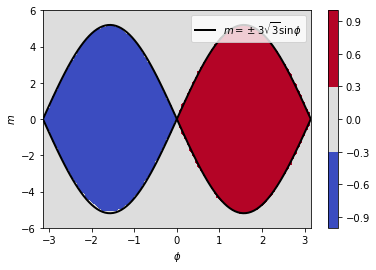

In [378]:
from pylab import *
cmap = cm.get_cmap('coolwarm', 3)

plt.contourf(phirange,mrange, Chern, 20, cmap=cmap)
x=np.linspace(-np.pi,np.pi,100)
plt.plot(x,3*np.sqrt(3)*np.sin(x),color="k",label="$m=\pm 3\sqrt{3}\sin \phi$",linewidth=2)
plt.plot(x,-3*np.sqrt(3)*np.sin(x),color="k",linewidth=2)
plt.legend(loc=1)
plt.xlabel("$\phi$")
plt.ylabel("$m$")
plt.colorbar();
plt.savefig("Haldane model phase diagram.pdf")